# CSE 5520 Homework 2

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Sept / 15


This is Lynn Pepin's report for CSE 5520 homework 2.

# Part 1: Normal Distribution

## Step 1.

Download the NBA data (nba.csv) from HuskyCT which is available in the directory, called “Data Files”. This file is in csv format.

In [1]:
from math import * # i only ever import * from math, i swear, i swear!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

EPS = 0.000001 # epsilon used as an extremely small value constant
FINAL = True # Constant, turned off for submitted HW
nbadf = pd.read_csv("nba.csv")

## Step 2.

Compute the mean and standard deviation of the heights of NBA players, say, mu and sigma, respectively.

In [2]:
nbamu  = nbadf['Height'].mean(axis=0)
nbastd = nbadf['Height'].std(axis=0)

print(f"NBA players have mean height {nbamu:.2f} with std-dev {nbastd:.2f}")

NBA players have mean height 79.27 with std-dev 3.48


## Step 3.

Create a histogram summarizing the NBA player’s height distribution. Think what would be the desired x-axis’s interval for the plot.



> *Lynn's thoughts: I think a value of '1' is a perfectly natural interval. This is close to the standard deviation too. And the heights are measured in intervals of 1, so I am using 1.*

<AxesSubplot:>

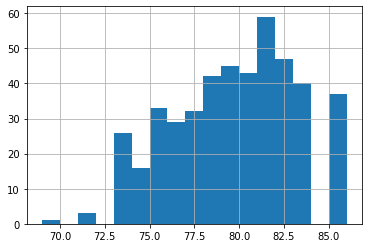

In [3]:
bin_range = range(
    min(nbadf['Height']),
    max(nbadf['Height'])
)

nbadf['Height'].hist(
    bins=bin_range
)

## Step 4.
Show the distribution using boxplot.

<AxesSubplot:>

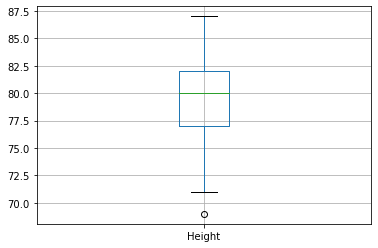

In [4]:
nbadf.boxplot(column='Height')

## Step 5.
Show the distribution using violin plot.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f5b9749df40>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f5b9749ddf0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f5b974b1490>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f5b974b17c0>}

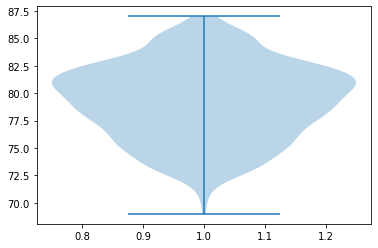

In [5]:
plt.violinplot(nbadf['Height'])

## Step 6.
Convert the histogram you created in Step 3 using z-values for the heights of the players.
Think what would be the desired x-axis’s interval for the plot.


> *Lynn's thoughts: The original height values have a resolution of '1'. I chose '1' previously because it matched this resolution, was close to the stddev, and because it's nice and naturally interpretable. But now, dividing by std-dev, we get something closer to a bin of 0.333.*
> 
> *I will just use bin-sizes of 0.5, that seems easiest.*

<AxesSubplot:>

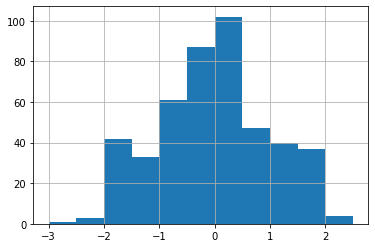

In [6]:
nba_zheights = (nbadf['Height'] - nbamu)/nbastd

zbinmin = floor(min(nba_zheights)*2)/2
zbinmax = ceil(max(nba_zheights)*2)/2

zbinrange = np.arange(zbinmin - EPS, zbinmax + EPS, 0.5)

nba_zheights.hist(
    bins=zbinrange
)

<AxesSubplot:>

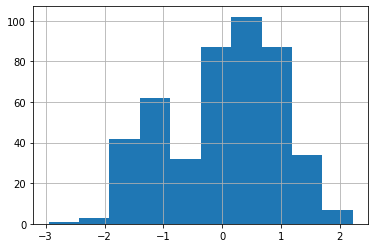

In [7]:
# Let's compare it to the 'default' binning pandas provides
nba_zheights.hist()

## Step 7.
Compute the mean and standard deviation of the heights of NBA players in terms of zvalues, say, mu_z and sigma_z, respectively.

> *Lynn's thoughts: I believe you mean to say to find the mean and std-dev, but we expect these to be 0 and 1, respectively. I assume this is just to "check" our work. Let's see!*

In [8]:
nbazmu  = nba_zheights.mean(axis=0)
nbazstd = nba_zheights.std(axis=0)

assert abs(nbazmu - 0.00) < EPS, "Z-mean should be near zero!"
assert abs(nbazstd - 1.00) < EPS, "Z-std should be near 1!" 

print(f"NBA zplayers have mean zheight {nbazmu:.2f} with zstd-dev {nbazstd:.2f}")

NBA zplayers have mean zheight -0.00 with zstd-dev 1.00


## Step 8.
Show the distribution using boxplot using z-scores.

<AxesSubplot:>

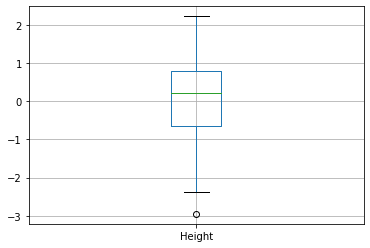

In [9]:
pd.DataFrame(nba_zheights).boxplot()

## Step 9.
Show the distribution using violin plot using z-scores.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f5b972951c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f5b97308f10>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f5b972955e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f5b972958b0>}

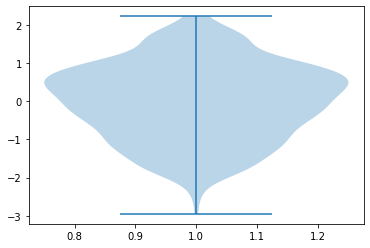

In [10]:
plt.violinplot(nba_zheights)

## Step 10.
Create a normal distribution graph using mu and sigma you created in Step 2 (you are
using formula for this) and overlay it on the histogram you created in Step 3. You can do this
using matplotlib.pyplots.subplots.

In [11]:
norm_h = scipy.stats.norm(loc=nbamu, scale=nbastd)

pdf_x = np.linspace(nbamu - 6*nbastd, nbamu + 6*nbastd, 601)
pdf_y = [norm_h.pdf(xx) for xx in pdf_x]

# verify it 'looks' right first
if not FINAL:
    plt.plot(pdf_x, pdf_y)

(array([0.00220751, 0.        , 0.00662252, 0.        , 0.05739514,
        0.03532009, 0.07284768, 0.06401766, 0.07064018, 0.09271523,
        0.09933775, 0.09492274, 0.13024283, 0.10375276, 0.08830022,
        0.        , 0.0816777 ]),
 array([69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86]),
 <BarContainer object of 17 artists>)

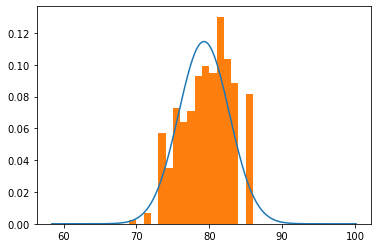

In [12]:
# Plot them together; no need for subplots in a notebook
plt.plot(pdf_x, np.array(pdf_y))
plt.hist(x=nbadf['Height'], bins=bin_range, density=True)

## Step 11.
Create a normal distribution graph using mu_z and sigma_z you created in Step 7 (you
are using formula for this) and overlay it on the histogram you created in Step 6. You can do this
using matplotlib.pyplots.subplots.

In [13]:
norm_z = scipy.stats.norm(loc=nbazmu, scale=nbazstd)

pdf_zx = np.linspace(nbazmu - 6*nbazstd, nbazmu + 6*nbazstd, 601)
pdf_zy = [norm_z.pdf(xx) for xx in pdf_zx]

# verify it 'looks' right first
if not FINAL:
    plt.plot(pdf_zx, pdf_zy)


(array([0.00437637, 0.0131291 , 0.18380744, 0.14442013, 0.26695842,
        0.38074398, 0.4463895 , 0.20568928, 0.1750547 , 0.1619256 ,
        0.01750547]),
 array([-3.000001e+00, -2.500001e+00, -2.000001e+00, -1.500001e+00,
        -1.000001e+00, -5.000010e-01, -1.000000e-06,  4.999990e-01,
         9.999990e-01,  1.499999e+00,  1.999999e+00,  2.499999e+00]),
 <BarContainer object of 11 artists>)

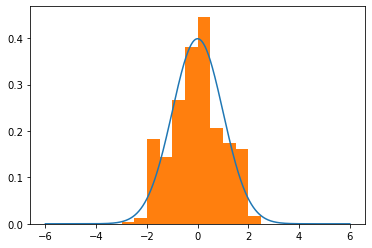

In [14]:
# Plot them together; no need for subplots
plt.plot(pdf_zx, np.array(pdf_zy))
plt.hist(x=nba_zheights, bins=zbinrange, density=True)

## Step 12.
Discuss the difference between the two sets of overlaid graphs you produced from Steps
10 and 11. Are the shapes different? How different? Do they say anything about the difference
between histograms and PDFs?


> **Answer:**
> 
> The shapes of the bell curve are identical.
> 
> The main difference is the binning on the histogram. The higher resolution on the graph in Step 10 makes it more clear that the distribution is not perfectly symmetrical.
> 
> The secondary difference, while obvious, is that the graph in Step 11 is normalized with std-dev 1 and mean 0.

## Step 13.
Calculate $P(x > 82)$, i.e., what is the probability for a player to have his/her height taller
than 82?

In [15]:
pxge82 = sum(nbadf['Height'] > 82) / len(nbadf['Height'])

print(f"We have P(x>82) = {pxge82:.3f}")

We have P(x>82) = 0.177


---

# Part II: Poisson, and Gamma Distributions

The Connecticut State Museum of Natural History at UCONN holds annual mushroom hunting trips in a mountain in Ashford. It is a half day trip lasting about 4 hours in a weekend in October.

It is known that each participant collects about 8 mushrooms in the trip and the event’s program fee is \$20.

You are pondering if you like to participate in this year’s event by considering various factors.

## Step 1

What is the probability that you collect “at least” 10 mushrooms?

Since you are paying $\$$20 fee, you are interested in figuring out if you can recoup your investment by estimating $\$$2 per fresh organic mushroom. 

As long as the chance is over 60\%, you like to register the event.

Show your decision with two accompanying probability distribution plots, one PMF and one CDF.


Show also the simulated PMF using `poisson.rvs1. You show three plots in total.



> ***Notes:***
> 
>  - Trip lasts ~4 hours
>  - Each participant collects about 8 mushrooms
>  - Fee is $\$ $20
>  - Each mushroom is worth about $\$ $ 2
>  - Register if you have a >60\% chance of finding at least 10 mushrooms.


> **Begin answer:**
> 
> Let's assume we can model finding a mushroom with the Poisson distribution.
> 
> The average number of mushrooms found in 4 hours, $\lambda = 8$, parameterizes our Poisson distribution.
> 
> Let `mushrooms_picked` be sampled from `Poisson(8)`. We know that $Prob(mushrooms_picked >= 10) = 1 - Prob(mushrooms_picked < 10)$, which lets us get an exact likelihood in finite time rather than taking an infinite series.
> 
> Alternatively, we can use the gamma function in the CDF, but that is difficult, and we have a Python interpreter *in the very next cell*. 
> 
> (We can also call `1-scipy.stats.poisson(mu=8).cdf(10)`, but that feels like cheating.)
> 
> So, let's answer the question: **How likely is it to find at least 10 mushrooms?**

In [16]:
# poisson rv with lambda=8
poisson_8 = scipy.stats.poisson(mu=8)

prob_lt_10 = sum([poisson_8.pmf(ii) for ii in range(10)])

print(f"Likelihood of finding at least 10 mushrooms is {1 - prob_lt_10:.2f}.")

Likelihood of finding at least 10 mushrooms is 0.28.


In [17]:
# let's check this is right
assert prob_lt_10 - poisson_8.cdf(9) < EPS, "Oh no! I got my math wrong!"

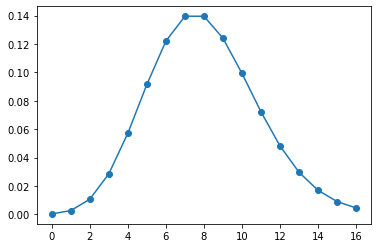

In [18]:
pois_xs = list(range(0,17))
pois_ys = [poisson_8.pmf(xx) for xx in pois_xs]
pois_cdf_ys = [poisson_8.cdf(xx) for xx in pois_xs]

plt.scatter(pois_xs, pois_ys)
plt.plot(pois_xs, pois_ys)

# It's discrete, but I like adding lines

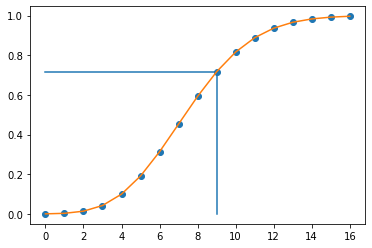

In [19]:
# Show our plot, with the intercept at our value of 10.
plt.plot([0, 9, 9+EPS], [pois_cdf_ys[9], pois_cdf_ys[9], 0])
plt.plot(pois_xs, pois_cdf_ys)
plt.scatter(pois_xs, pois_cdf_ys)

>  ... Oh no. **We find a 28\% chance.** I guess I won't recoup my losses here. 

## Step 2.

You are anxious to know how quickly you can collect the first mushroom from the trip. This is because your priority is not recouping your investment for the event but to enjoy the excitement of finding the first fresh wild mushroom and come back to complete the homework after you found one.

What is the probability that you can get the first mushroom within one hour of the trip?

As long as the chance is over 60\%, you like to register the event. Show your decision with an accompanying probability distribution plot.


> **Begin answer:**
> 
> Keeping in mind that our time unit is 4 hours, we know that we expect our events to occur in $\lambda^{-1}$ time units, that is to say, $4 / 8$, or, 30 minutes.
> 
> This is parameterized by the exponential function with the same $\lambda = 8$. We want to see the likelihood of having an event in $1$ hour, or $0.25$ units.

In [20]:
exponential_8 = scipy.stats.expon(scale=1/8)
# See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
# scale = 1 / lambda

In [21]:
p_exp8_ltp25 = exponential_8.cdf(0.25)
print(f"Likelihood of finding a mushroom in 1 hour is {p_exp8_ltp25:.2f}")

Likelihood of finding a mushroom in 1 hour is 0.86


In [22]:
# Yay! Let's look at this in terms of pdf and cdf
exp8_xs = np.linspace(0,1,1001)
exp8_pdf = [exponential_8.pdf(xx) for xx in exp8_xs]
exp8_cdf = [exponential_8.cdf(xx) for xx in exp8_xs]

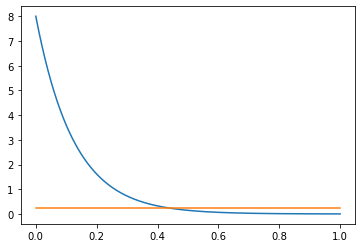

In [23]:
plt.plot(exp8_xs, exp8_pdf)
plt.plot([0, 1], [.25, .25])

# Note: Plotted in terms of 1-hour intervals!

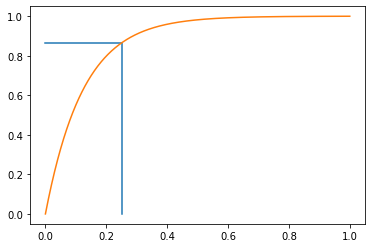

In [24]:
# CDF
plt.plot([0, .25, .25], [exponential_8.cdf(.25), exponential_8.cdf(.25), 0])
plt.plot(exp8_xs, exp8_cdf)

>  Hooray!! **The likeligood is about 86%. I am excited to pick mushrooms!**

## Step 3.

You are exploring a different scenario. Why not recoup some investment and also come back early to complete the homework?

What is the probability that you can get the four mushrooms within 2 hours of the trip?

As long as the chance is over 60%, you like to register the event. Show your decision with an accompanying probability distribution plot.

> Recall we have $\lambda = 8$, that is, an expected value of 8 mushrooms in a time unit of 4 hours.
> 
> We can divide this linearly: With a time unit of 2 hour, we have a new $\lambda = 8 \cdot \frac{2}{4} = 4$ parameter.
> 
> That is to say, with a time unit of 2 hours instead of 4, we should expect to get 4 mushrooms.
> 
> Let's calculate below, using $\lambda = 4$ and a time interval of two hours.

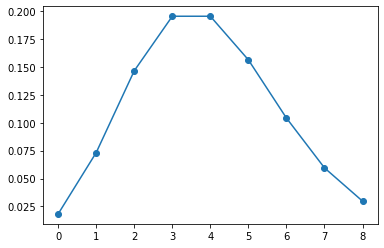

In [25]:
pois_4 = scipy.stats.poisson(mu=4)

pois4_xs = list(range(0,9))
pois4_ys = [pois_4.pmf(xx) for xx in pois4_xs]
pois4_cdf_ys = [pois_4.cdf(xx) for xx in pois4_xs]

plt.scatter(pois4_xs, pois4_ys)
plt.plot(pois4_xs, pois4_ys)

# It's discrete, but I think lines look nice :)

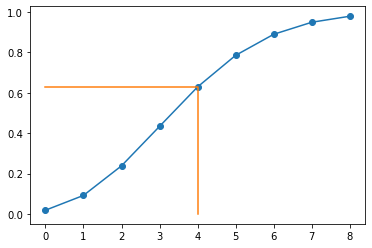

In [26]:
# now cdf
plt.scatter(pois4_xs, pois4_cdf_ys)
plt.plot(pois4_xs, pois4_cdf_ys)
plt.plot([0, 4, 4], [pois_4.cdf(4), pois_4.cdf(4), 0])

The likelihood of getting 4 or more mushrooms is given as follows:

In [27]:
# Just a quick check... These are equal right?
assert sum([pois_4.pmf(ii) for ii in [0,1,2,3, 4]]) - pois_4.cdf(4) < EPS

print(f"We expect to get at least 4 mushrooms with probability {1 - pois_4.cdf(3):.3f}")

We expect to get at least 4 mushrooms with probability 0.567


... So, sadly, **because we have a 58\% chance of getting at least 4 mushrooms, we do not go on the trip.**

---

# Part III: Beta Distribution

Consider back to NBA statistics. Giannis Antetokounmpo having nick name “Greek Freak” was
instrumental in helping Milwaukee win 2020-2021 NBA championship. His FG% for the season
was 0.569 (Wikipedia).

## Step 1.

Assume his FG% was from making 1140 goals from 2003 shots (attempts). Create a Beta
distribution plot for Giannis Antetokounmpo’s FG% for that season.


> **Notes:**
> 
> I have no idea what an 'FG%' is and had to search it up. This is a "Field Goal" percent, which is calculated using a ratio of "field goals made" to "field goals attempted."
> 
> I am unclear on what a "field goal" is, so I consulted the NBA rulebook: https://official.nba.com/rulebook/, which, unfortunately, only has definitions for a "field goal attempt". **I am not familiar with basketball, so I am assuming field goals as a simple points system.**
> 
> Here, we have $\alpha = 1140$ and $\beta = 2003$, and we expect a mean of $1140 / (1140+2003)$. We will use this as our 'prior'.

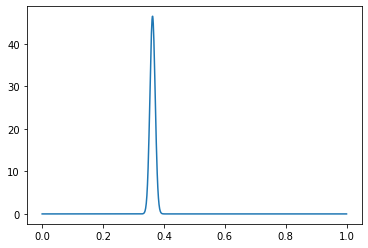

In [28]:
beta_xs = np.linspace(0, 1, 1001)
beta_ys = [
    scipy.stats.beta.pdf(x = xx, a = 1140, b = 2003)
    for xx in beta_xs]

plt.plot(beta_xs, beta_ys)

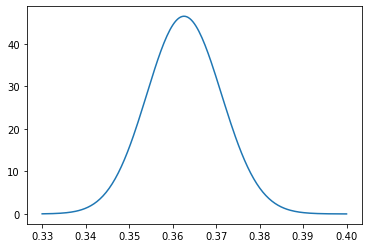

In [29]:
# Let's focus on the range .33, .4

tmp_xs = np.linspace(.33, .4, 201)
plt.plot(
    tmp_xs,
    [scipy.stats.beta.pdf(x = xx, a = 1140, b = 2003)
     for xx in tmp_xs]
)

## Step 2.

Suppose this Greek Freak did 27 goals from 35 shots during the first game in Fall 2021.

Can you estimate his FG% for the upcoming season using beta distribution? You are approximating $\alpha$ and $\beta$ for this and rely on the python function to create the Beta distribution plot similar to what has been discussed in class, i.e., show both prior and posterior distributions.

> This is simply enough, we use new parameters, $\alpha = 1140 + 27$ and $\beta = 2003 + 35$.

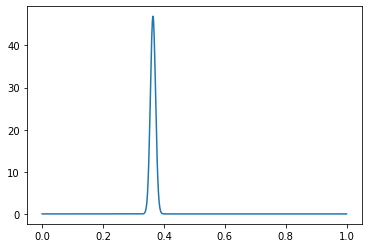

In [30]:
beta_xs = np.linspace(0, 1, 1001)
beta_ys = [
    scipy.stats.beta.pdf(x = xx, a = 1140 + 27, b = 2003 + 35)
    for xx in beta_xs]

plt.plot(beta_xs, beta_ys)

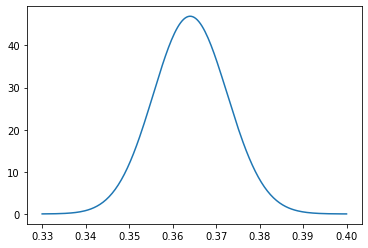

In [31]:
# Let's focus again on the range .33, .4

tmp_xs = np.linspace(.33, .4, 201)
plt.plot(
    tmp_xs,
    [scipy.stats.beta.pdf(x = xx, a = 1140 + 27, b = 2003 + 35)
     for xx in tmp_xs]
)

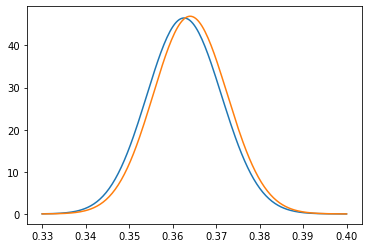

In [32]:
# Now, let's plot them together

tmp_xs = np.linspace(.33, .4, 201)

plt.plot(
    tmp_xs,
    [scipy.stats.beta.pdf(x = xx, a = 1140, b = 2003)
     for xx in tmp_xs]
)

plt.plot(
    tmp_xs,
    [scipy.stats.beta.pdf(x = xx, a = 1140 + 27, b = 2003 + 35)
     for xx in tmp_xs]
)

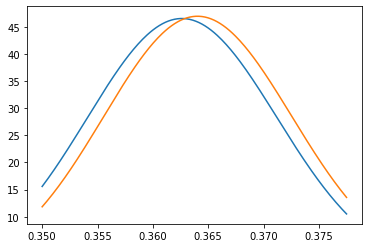

In [33]:
# Let's focus closer to the peak

# Now, let's plot them together

tmp_xs = np.linspace(.35, .3775, 201)

plt.plot(
    tmp_xs,
    [scipy.stats.beta.pdf(x = xx, a = 1140, b = 2003)
     for xx in tmp_xs]
)

plt.plot(
    tmp_xs,
    [scipy.stats.beta.pdf(x = xx, a = 1140 + 27, b = 2003 + 35)
     for xx in tmp_xs]
)

---